# ***DATA COLLECTION***

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import kagglehub

path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [ ]:
train_path='/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/'
test_path='/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing/'

In [ ]:
import os
filename = '/kaggle/input/brain-tumor-mri-dataset'
train_path = os.path.join(filename, 'Training/')
test_path = os.path.join(filename, 'Testing/')

In [ ]:
classes=[]
filename='/kaggle/input/brain-tumor-mri-dataset'
for sub_folder in os.listdir(os.path.join(filename,'Training')):
    classes.append(sub_folder)
print(classes)


['pituitary', 'notumor', 'meningioma', 'glioma']


In [ ]:
#TRAINING DATA
img_list=[]
label_list=[]
for label in classes:
  for img_file in os.listdir(train_path+label):
    img_list.append(train_path+label+'/'+img_file)
    label_list.append(label)

train_data = pd.DataFrame({'Image':img_list,'Label':label_list})
train_data

,Image,Label
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
...,...,...
5707,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5708,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5709,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5710,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma


In [ ]:
#TRAINING DATA
img_list=[]
label_list=[]
for label in classes:
  for img_file in os.listdir(train_path+label):
    img_list.append(train_path+label+'/'+img_file)
    label_list.append(label)

train_data = pd.DataFrame({'Image':img_list,'Label':label_list})
train_data

,Image,Label
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
...,...,...
5707,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5708,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5709,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5710,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma


In [ ]:
#TESTING DATA
img_list=[]
label_list=[]
for label in classes:
    for img_file in os.listdir(test_path+label):
        img_list.append(test_path+label+'/'+img_file)
        label_list.append(label)
test_data = pd.DataFrame({'Image':img_list,'Label':label_list})
test_data

,Image,Label
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
...,...,...
1306,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1307,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1308,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1309,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma


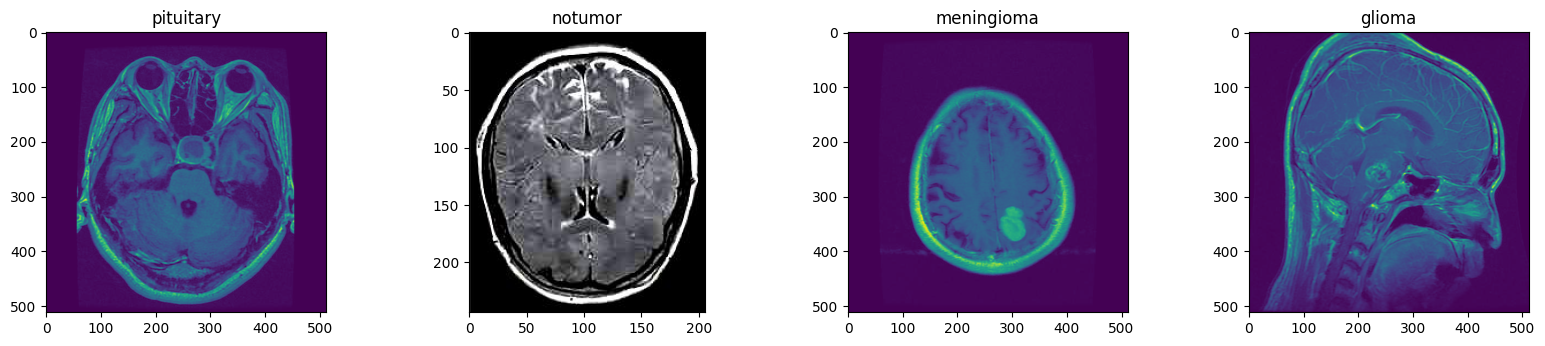

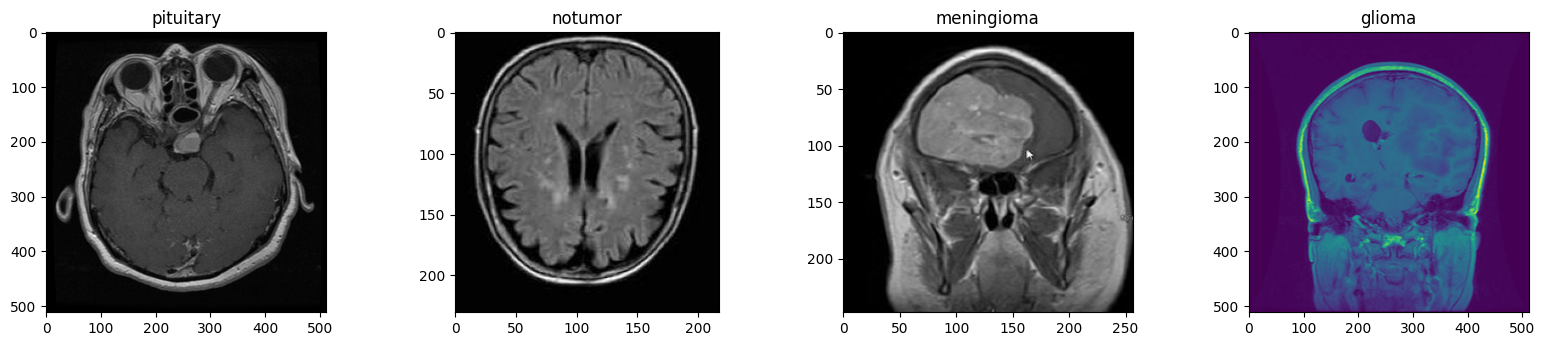

In [ ]:
def Plot_Classes(BASE_URL, Rows=2, Columns=5):
  plt.figure(figsize = (25, 8))
  image_count = 1
  for directory in os.listdir(BASE_URL):
      if directory[0] != '.':
          Max_Random = len(os.listdir(os.path.join(BASE_URL,directory)))
          Random_Number = np.random.randint(0, Max_Random)
          for i, file in enumerate(os.listdir(BASE_URL + directory)):
              if i == Random_Number:
                  fig = plt.subplot(Rows, Columns, image_count)
                  image_count += 1
                  image = plt.imread(BASE_URL + directory + '/' + file)
                  plt.imshow(image)
                  plt.title(directory)

                  break
Plot_Classes(train_path)
Plot_Classes(test_path)

In [ ]:
train_data['Label'].value_counts()

,count
Label,
notumor,1595
pituitary,1457
meningioma,1339
glioma,1321


In [ ]:
px.histogram(train_data, y="Label", color="Label", title="Classes Distribution")

In [ ]:
test_data['Label'].value_counts()

,count
Label,
notumor,405
meningioma,306
pituitary,300
glioma,300


In [ ]:
px.histogram(test_data, y="Label", color="Label", title="Classes Distribution")

# **DATA PREPOSSESING**

In [ ]:
image_size = (150, 150)
batch_size = 32

In [ ]:
#AUGMENTED DATASETS
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   brightness_range=(0.85, 1.15),
                                     width_shift_range=0.002,
                                   height_shift_range=0.002,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")


train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    seed=0)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=False,
                                                  seed=0)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


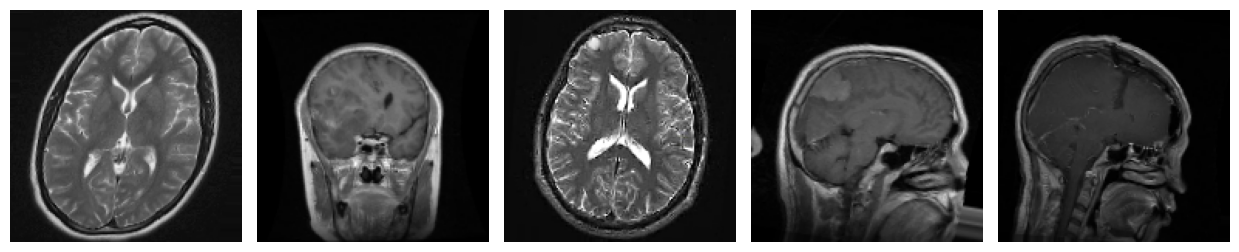

In [ ]:
#VISUALIZATION OF AUGMENTED DATASETS
def show_ImageDataGenerator(ImageDataGenerator, num_samples=5, figsize=(12, 12), save=False):
    """
    Function to viusalize how the ImageDataGenerator augments the data
    """

    augmented_samples = train_generator.__next__()

    images = augmented_samples[0][:num_samples]

    fig, axes = plt.subplots(1, num_samples, figsize=figsize)

    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')

    plt.tight_layout()

    if save:
        plt.savefig('show_ImageDataGenerator.pdf')

    plt.show()
show_ImageDataGenerator(train_datagen, num_samples=5, figsize=(12.5, 8), save=False)

# **TRAINING DATA SET**

In [ ]:
image_shape = (image_size[0], image_size[1], 3)

print(f'Image shape: {image_shape}')
print(f'Batch size: {batch_size}')
print(f'Number of Train batches: {len(train_generator)}')
print(f'Number of Validation batches: {len(test_generator)}')

Image shape: (150, 150, 3)
Batch size: 32
Number of Train batches: 179
Number of Validation batches: 41


In [ ]:
Classes_Map = train_generator.class_indices

num_classes = len(Classes_Map)

print("Number of Classes:", num_classes)
Classes_Map

Number of Classes: 4


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [ ]:
#FINE TUNING HYPERPARAMETERS
#OVERFITTING ISSUES


def plot_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(15,5))
  plt.style.use('ggplot')


  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, 'bo-' , label = "Train Loss")
  plt.plot(epochs, val_loss, 'o-' , color='orange', label = "Val Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, 'bo-' , label = "Train Acc")
  plt.plot(epochs, val_accuracy, 'o-' , color='orange' , label = "Val Acc")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.style.use('default')

In [ ]:
def CM(model, test_generator, categories):
    """
    Function to return the confusion matrix of a given CNN model.
    """
    from sklearn.metrics import confusion_matrix

    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    confusion_matrix_array = confusion_matrix(true_categories, predicted_categories)
    print(f"Classification Report for {model}:")
    print(classification_report(true_categories, predicted_categories, target_names=categories))

    return confusion_matrix_array


def calculate_metrics(confusion_matrix, categories):
    """
    Function to calculate important metrics for multi-classification problems.
    """
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-Score: {f1_score[i]:.3f}\n")

    print(f"\nAccuracy: {accuracy:.3f}")

# **CNN Model**



In [ ]:
#CNN USING KERAS

def create_cnn_model(input_shape=image_shape, num_classes=num_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()
cnn_model.summary()
cnn_history = cnn_model.fit(train_generator,epochs=18,validation_data=test_generator)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 74s 379ms/step - accuracy: 0.5136 - loss: 1.0537 - val_accuracy: 0.7468 - val_loss: 0.7073
Epoch 2/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 50s 282ms/step - accuracy: 0.7874 - loss: 0.5396 - val_accuracy: 0.7872 - val_loss: 0.5140
Epoch 3/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 49s 274ms/step - accuracy: 0.8305 - loss: 0.4368 - val_accuracy: 0.8436 - val_loss: 0.4137
Epoch 4/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 299ms/step - accuracy: 0.8671 - loss: 0.3413 - val_accuracy: 0.8772 - val_loss: 0.3270
Epoch 5/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 85s 317ms/step - accuracy: 0.8868 - loss: 0.2990 - val_accuracy: 0.8535 - val_loss: 0.3936
Epoch 6/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 49s 275ms/step - accuracy: 0.9081 - loss: 0.2492 - val_accuracy: 0.9062 - val_loss: 0.2365
Epoch 7/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 49s 275ms/step - accuracy: 0.9225 - loss: 0.2019 - val_accuracy: 0.9283 - val_loss: 0.1964
Epoch 8/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 50s 278ms/step - accuracy: 0.9287 - loss: 0

## **CNN Model Evaluation**

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9656 - loss: 0.0980
Test Loss: 0.06503
Test Accuracy: 0.97864


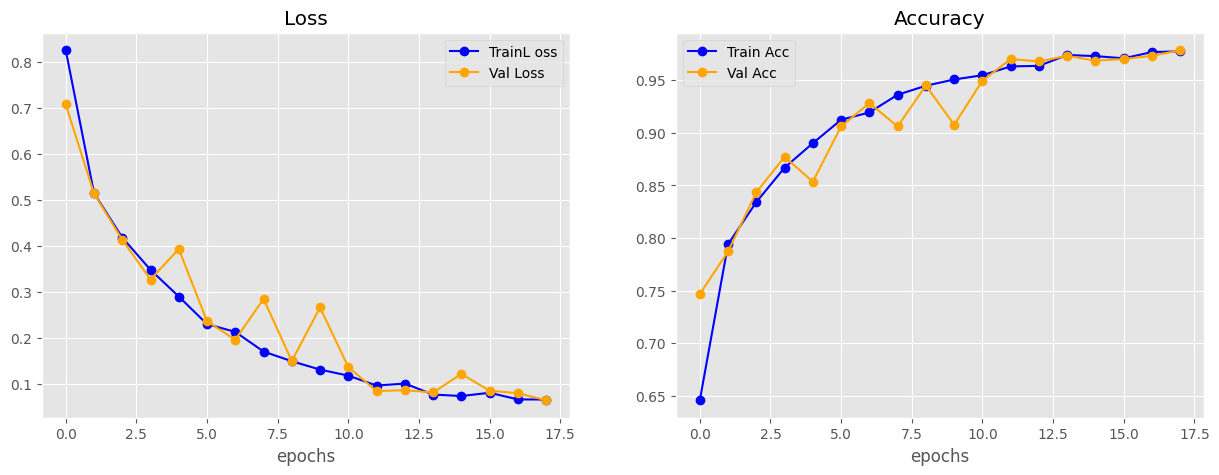

In [ ]:
plot_curves(cnn_history)
loss, accuracy = cnn_model.evaluate(test_generator)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step
Classification Report for <Sequential name=sequential, built=True>:
              precision    recall  f1-score   support

   pituitary       0.99      0.95      0.97       300
     notumor       0.95      0.96      0.96       306
  meningioma       0.98      1.00      0.99       405
      glioma       0.99      1.00      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



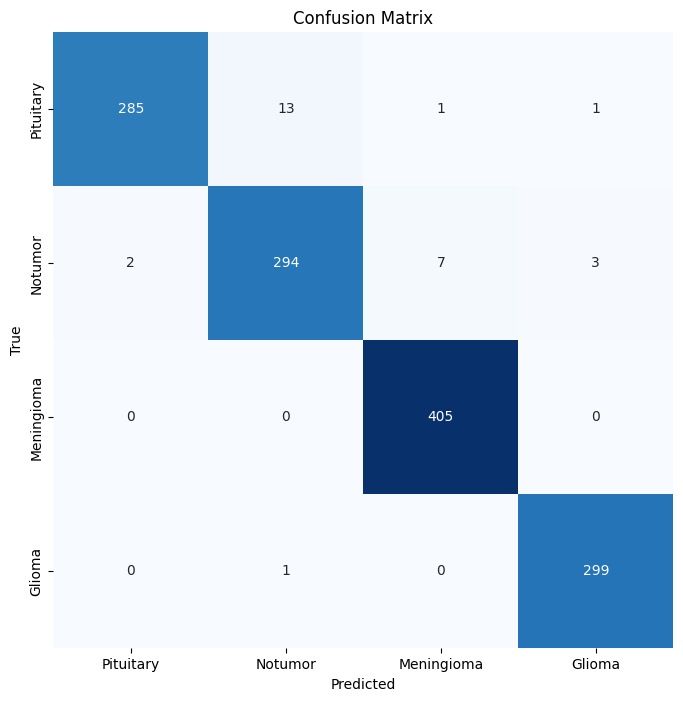

In [ ]:
confusion_matrix = CM(model=cnn_model, test_generator=test_generator, categories=classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], va='center')
plt.show()

# **VGG16 Model**

In [ ]:
#VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


for layer in base_model_vgg.layers[:-4]:
    layer.trainable = False

x = base_model_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=base_model_vgg.input, outputs=output)

model_vgg.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg.summary()

vgg_history = model_vgg.fit(train_generator,epochs=18,validation_data=test_generator)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,979,396 (57.14 MB)

 Trainable params: 7,344,132 (28.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 77s 379ms/step - accuracy: 0.6976 - loss: 0.7311 - val_accuracy: 0.8124 - val_loss: 0.5324
Epoch 2/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 305ms/step - accuracy: 0.8966 - loss: 0.2837 - val_accuracy: 0.8947 - val_loss: 0.2987
Epoch 3/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 56s 312ms/step - accuracy: 0.9276 - loss: 0.1977 - val_accuracy: 0.9397 - val_loss: 0.1702
Epoch 4/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 316ms/step - accuracy: 0.9449 - loss: 0.1570 - val_accuracy: 0.9428 - val_loss: 0.1724
Epoch 5/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 307ms/step - accuracy: 0.9651 - loss: 0.1037 - val_accuracy: 0.9611 - val_loss: 0.1112
Epoch 6/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 308ms/step - accuracy: 0.9624 - loss: 0.0996 - val_accuracy: 0.9779 - val_loss: 0.0740
Epoch 7/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 318ms/step - accuracy: 0.9796 - loss: 0.0649 - val_accuracy: 0.9580 - val_loss: 0.1072
Epoch 8/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 92s 373ms/step - accuracy: 0.9796 - loss: 0

## **VGG16 Model Evaluation**

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9875 - loss: 0.0433
Test Loss: 0.03102
Test Accuracy: 0.99085


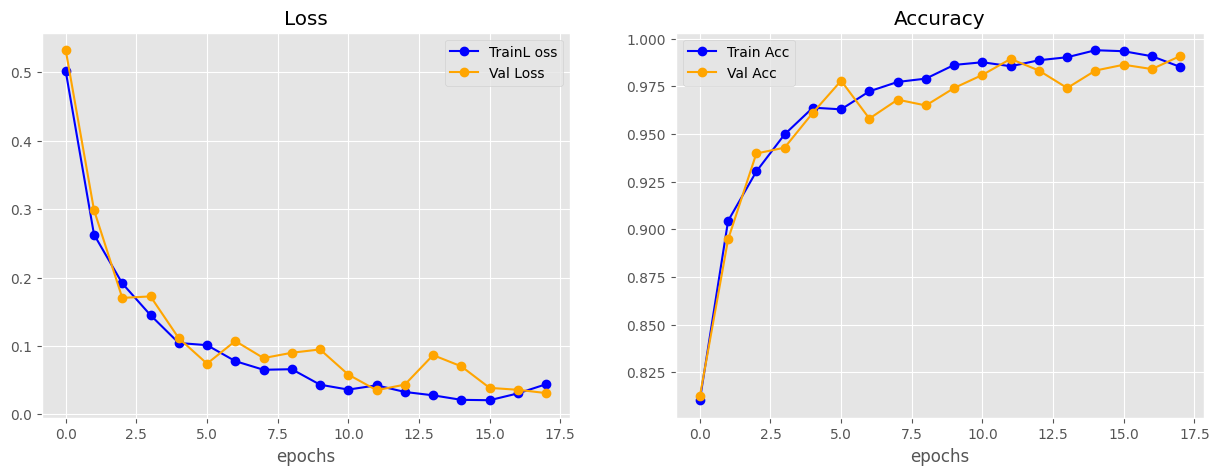

In [ ]:
plot_curves(vgg_history)

loss, accuracy = model_vgg.evaluate(test_generator)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step
Classification Report for <Functional name=functional_12, built=True>:
              precision    recall  f1-score   support

   pituitary       1.00      0.98      0.99       300
     notumor       0.97      0.99      0.98       306
  meningioma       1.00      1.00      1.00       405
      glioma       0.99      1.00      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



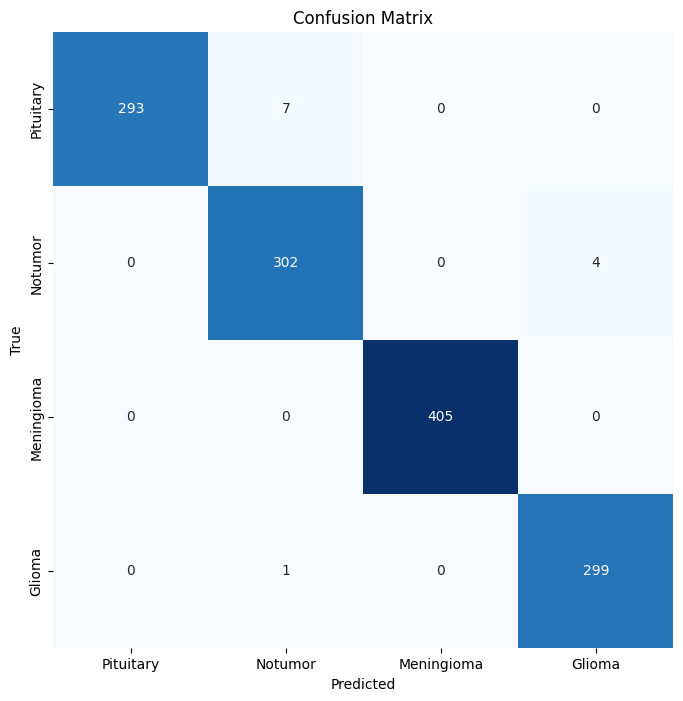

In [ ]:
confusion_matrix = CM(model=model_vgg, test_generator=test_generator, categories=classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], va='center')
plt.show()


# **ResNet101 Model**


In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model_resnet = ResNet101(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)
model_resnet = Model(inputs=base_model_resnet.input, outputs=output)
model_resnet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.summary()
resnet_history = model_resnet.fit(train_generator,epochs=18,validation_data=test_generator)

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 43,709,316 (166.74 MB)

 Trainable params: 43,603,972 (166.34 MB)

 Non-trainable params: 105,344 (411.50 KB)

Epoch 1/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 219s 642ms/step - accuracy: 0.7903 - loss: 0.5355 - val_accuracy: 0.3082 - val_loss: 8.6723
Epoch 2/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 119s 387ms/step - accuracy: 0.9582 - loss: 0.1245 - val_accuracy: 0.3349 - val_loss: 1.8969
Epoch 3/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 69s 387ms/step - accuracy: 0.9693 - loss: 0.0889 - val_accuracy: 0.3417 - val_loss: 4.5700
Epoch 4/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 391ms/step - accuracy: 0.9808 - loss: 0.0628 - val_accuracy: 0.5507 - val_loss: 1.2458
Epoch 5/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 391ms/step - accuracy: 0.9863 - loss: 0.0465 - val_accuracy: 0.8162 - val_loss: 0.6802
Epoch 6/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 69s 384ms/step - accuracy: 0.9853 - loss: 0.0419 - val_accuracy: 0.9733 - val_loss: 0.0822
Epoch 7/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 70s 390ms/step - accuracy: 0.9861 - loss: 0.0443 - val_accuracy: 0.9275 - val_loss: 0.2512
Epoch 8/18
179/179 ━━━━━━━━━━━━━━━━━━━━ 69s 387ms/step - accuracy: 0.9920 - loss:

## **ResNet101 Model Evaluation**

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9292 - loss: 0.3716
Test Loss: 0.39785
Test Accuracy: 0.92143


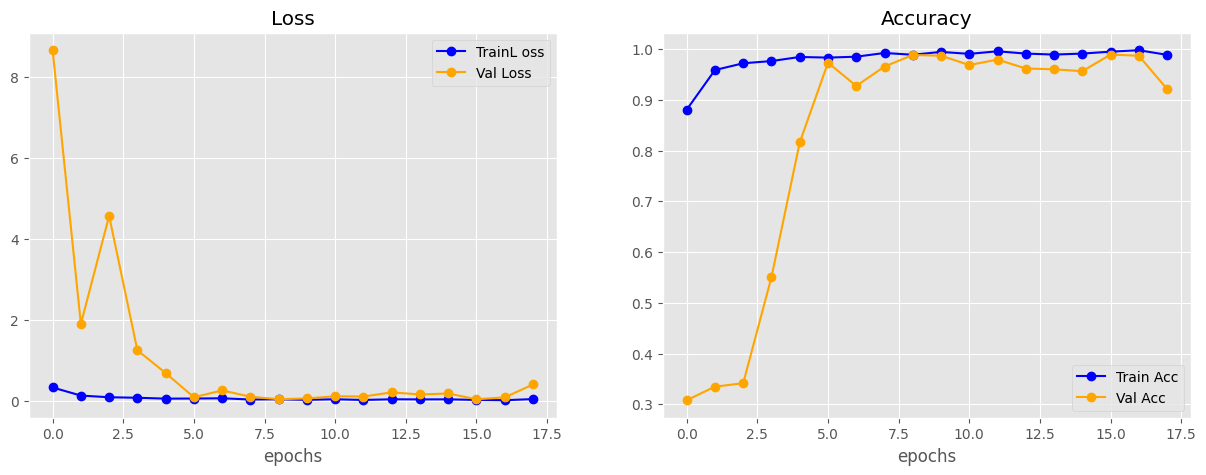

In [ ]:
plot_curves(resnet_history)
loss, accuracy = model_resnet.evaluate(test_generator)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step
Classification Report for <Functional name=functional_13, built=True>:
              precision    recall  f1-score   support

   pituitary       0.90      1.00      0.95       300
     notumor       0.87      0.79      0.83       306
  meningioma       0.96      0.91      0.93       405
      glioma       0.94      1.00      0.97       300

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.92      0.92      0.92      1311



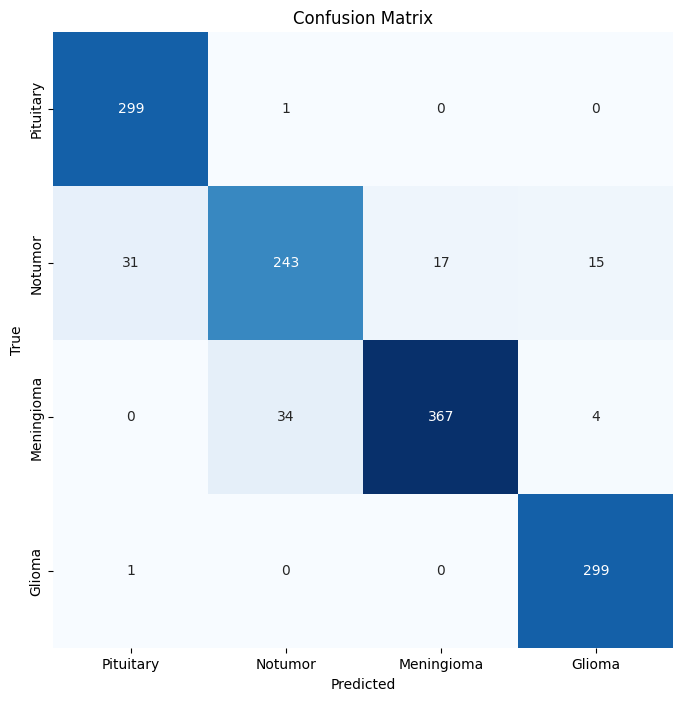

In [ ]:
confusion_matrix = CM(model=model_resnet, test_generator=test_generator, categories=classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], va='center')
plt.show()

# **Random Batching**

{'pituitary': 0.0, 'notumor': 0.0, 'meningioma': 0.0, 'glioma': 100.0}
{'pituitary': 0.0, 'notumor': 0.0, 'meningioma': 0.0, 'glioma': 100.0}
{'pituitary': 0.0, 'notumor': 0.0, 'meningioma': 0.0, 'glioma': 100.0}
{'pituitary': 0.0, 'notumor': 0.0, 'meningioma': 0.0, 'glioma': 100.0}
{'pituitary': 0.0, 'notumor': 0.0, 'meningioma': 0.0, 'glioma': 100.0}
{'pituitary': 0.0, 'notumor': 0.0, 'meningioma': 0.0, 'glioma': 100.0}
{'pituitary': 0.0, 'notumor': 0.0, 'meningioma': 0.0, 'glioma': 100.0}
{'pituitary': 67.076, 'notumor': 0.0, 'meningioma': 0.003, 'glioma': 32.921}
{'pituitary': 0.0, 'notumor': 0.0, 'meningioma': 0.0, 'glioma': 100.0}
{'pituitary': 0.058, 'notumor': 0.016, 'meningioma': 0.008, 'glioma': 99.919}


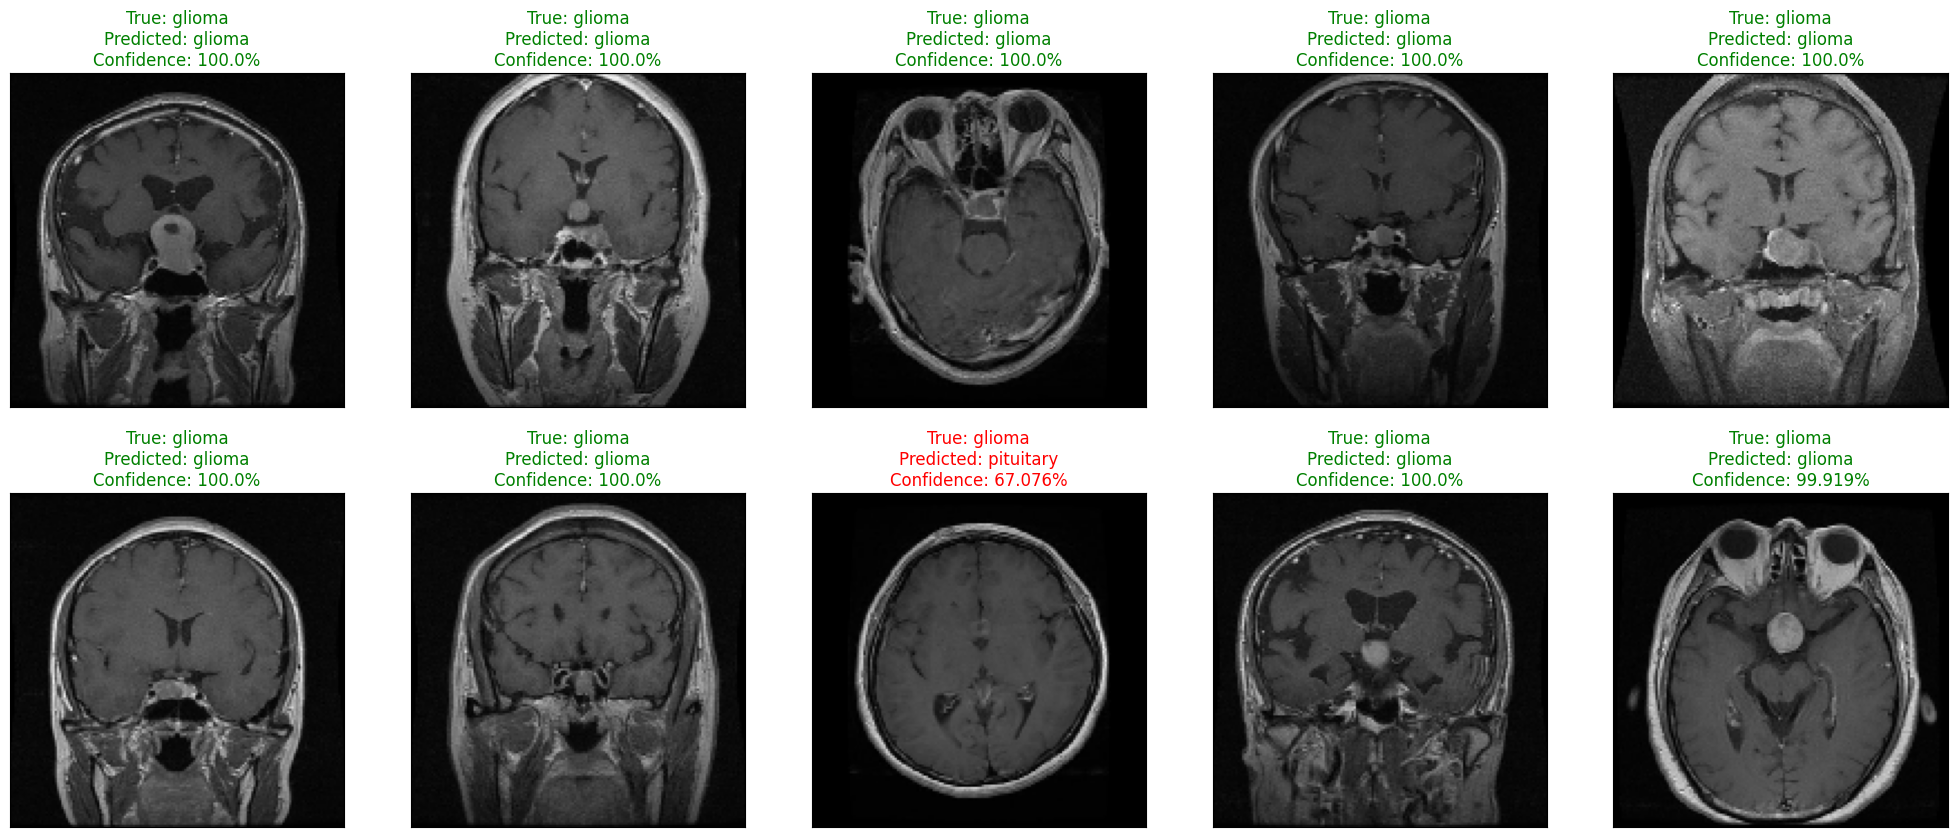

<Figure size 640x480 with 0 Axes>

In [ ]:
Random_batch = np.random.randint(0, len(test_generator))
Random_Img_Index = np.random.randint(0, batch_size , 10)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])
    Model_Predictions = model_resnet.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0)
    Model_Highest_Prediction = np.argmax(Model_Predictions)
    Model_Predictions_Map = { c: round(p*100,3) for (c,p) in zip (classes, Model_Predictions.tolist()[0] ) }
    ax.imshow(Random_Img)
    Pred_Class = classes[Model_Highest_Prediction]
    if classes[Random_Img_Label] == Pred_Class:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {classes[Random_Img_Label]}\nPredicted: {Pred_Class}\nConfidence: {Model_Predictions_Map[Pred_Class]}%",
          color=color)
    print(Model_Predictions_Map)
plt.show()
plt.tight_layout()

# ***GRAD-CAM***

In [ ]:
!pip install tensorflow
!pip install opencv-python-headless

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.models import Model

In [ ]:
def grad_cam(model, image, layer_name):
    """
    Works with both Sequential and Functional models.
    Automatically builds model if needed and handles input format.
    """
    import tensorflow as tf
    from tensorflow.keras.models import Model
    import numpy as np

    if isinstance(model, tf.keras.Sequential):
        model_input = tf.keras.Input(shape=image.shape)
        _ = model(tf.expand_dims(image, axis=0))
        model = Model(inputs=model.input, outputs=model.output)

    if not model.built:
        _ = model(tf.expand_dims(image, axis=0))

    grad_model = Model(inputs=model.input,
                       outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(tf.expand_dims(image, axis=0))
        pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Get an image from the test generator
img = test_generator[0][0][0]

# Make sure models are built
_ = cnn_model(tf.expand_dims(img, axis=0))
_ = model_vgg(tf.expand_dims(img, axis=0))
_ = model_resnet(tf.expand_dims(img, axis=0))

heatmap_vgg = grad_cam(model_vgg, img, layer_name="block5_conv3")
heatmap_resnet = grad_cam(model_resnet, img, layer_name="conv5_block3_out")

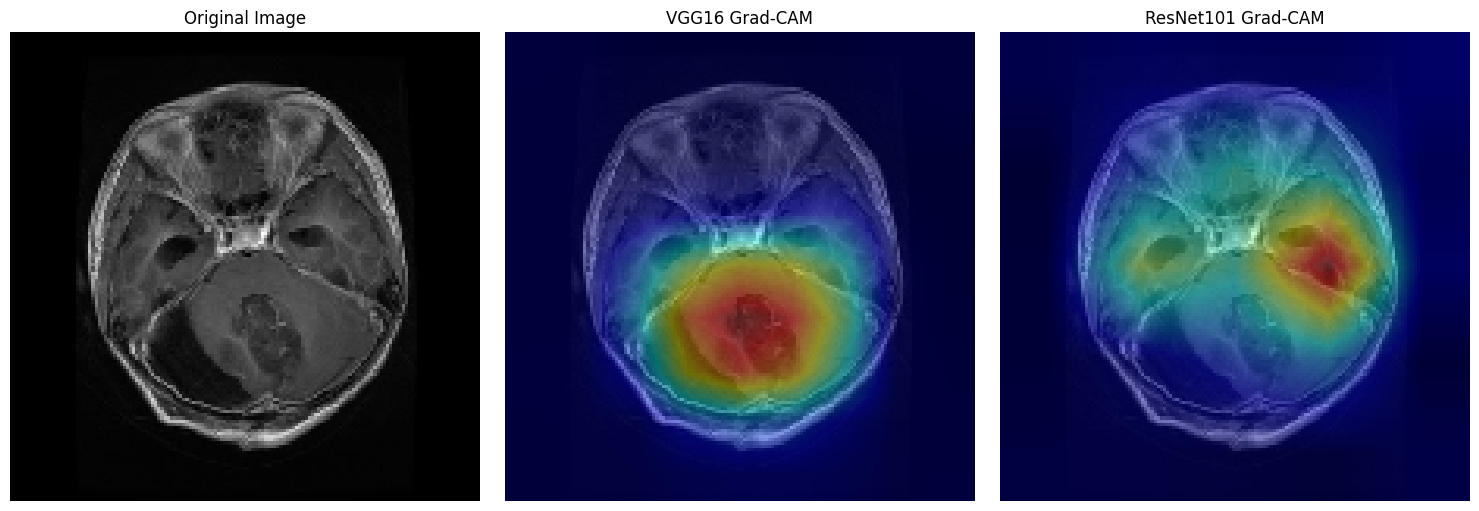

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def overlay_heatmap(image, heatmap, alpha=0.4):
    heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap_rescaled = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_rescaled, cv2.COLORMAP_JET)
    original = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
    superimposed_img = cv2.addWeighted(original, 1 - alpha, heatmap_colored, alpha, 0)
    return cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

# Overlay each heatmap
overlay_vgg = overlay_heatmap(img, heatmap_vgg)
overlay_resnet = overlay_heatmap(img, heatmap_resnet)


# Display
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(overlay_vgg)
plt.title("VGG16 Grad-CAM")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(overlay_resnet)
plt.title("ResNet101 Grad-CAM")
plt.axis('off')


plt.tight_layout()
plt.show()

# ***Front end integration***

In [ ]:
!pip install flask pyngrok flask-ngrok


In [ ]:
model_vgg.save("vgg16_model.h5")

In [ ]:
from google.colab import files
files.download("vgg16_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!rm -rf templates static uploads gradcam_utils.py app.py

In [ ]:
!mkdir -p templates static uploads

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("vgg16_model.h5")

OSError: Unable to synchronously open file (truncated file: eof = 4194304, sblock->base_addr = 0, stored_eof = 118773992)

In [ ]:
from google.colab import userdata
userdata.get('ngrok')

from pyngrok import ngrok
ngrok.set_auth_token("2vhsmGpNS8PixULuUOAd6okdbyB_3kXyYeZgEDFruv1imY76D")

In [ ]:
%%writefile gradcam_utils.py
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.cm as cm

def get_gradcam_heatmap(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]

    # Use broadcasting instead of modifying tensor
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    # Normalize between 0-1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap + tf.keras.backend.epsilon())
    return heatmap.numpy()

def save_gradcam_overlay(img_path, heatmap, cam_path="static/gradcam.jpg", alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    colormap = cm.get_cmap("jet")
    colored_heatmap = colormap(heatmap)
    colored_heatmap = np.uint8(255 * colored_heatmap[..., :3])
    superimposed_img = cv2.addWeighted(img, 1 - alpha, colored_heatmap, alpha, 0)
    cv2.imwrite(cam_path, superimposed_img)
    return cam_path

Writing gradcam_utils.py


In [ ]:
%%writefile app.py
from flask import Flask, request, render_template
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from gradcam_utils import get_gradcam_heatmap, save_gradcam_overlay


labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

app = Flask(__name__)
model = load_model("vgg16_model.h5")

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return "No file uploaded!", 400

    file = request.files['image']
    file_path = os.path.join("uploads", file.filename)
    file.save(file_path)

    img = load_img(file_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_class = int(np.argmax(prediction))
    confidence = round(float(np.max(prediction)) * 100, 2)
    label = labels[predicted_class]

    heatmap = get_gradcam_heatmap(model, img_array, layer_name="block5_conv3")
    save_gradcam_overlay(file_path, heatmap)

    return render_template("result.html", label=label, confidence=confidence)

if __name__ == '__main__':
    os.makedirs("uploads", exist_ok=True)
    os.makedirs("static", exist_ok=True)

    from pyngrok import ngrok
    ngrok.set_auth_token("2vhsmGpNS8PixULuUOAd6okdbyB_3kXyYeZgEDFruv1imY76D")
    public_url = ngrok.connect(5000)
    print(" * Public URL:", public_url)

    app.run(port=5000)

Writing app.py


In [ ]:
!python app.py

2025-04-15 06:49:14.677961: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744699754.725896   14713 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744699754.740042   14713 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-15 06:49:21.024627: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
 * Public URL: NgrokTunnel: "https://acb9-34-125-172-209.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app 'app'
 * Debug mode: off
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a producti